<a href="https://colab.research.google.com/github/kushalk20/Python-Projects/blob/main/RAC_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import xgboost as xgb
import statsmodels.formula.api as smf
import sklearn.metrics as skm
from sklearn import preprocessing
from sklearn import tree
from sklearn.linear_model import LogisticRegression
import graphviz

In [2]:
# 2.0
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
# 2.1 Where is our data file:
pathToFolder = "/gdrive/MyDrive/Python files"

In [6]:
#2.2 Full file path:
path = Path(pathToFolder) / "bank_churn.csv"

In [7]:
# Load dataset
churn = pd.read_csv(path)

In [9]:
churn.shape


(10000, 14)

In [10]:
churn.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
churn.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [12]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
churn.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [14]:
# missing data check
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
# Dropping unused columns
churn = churn.drop(['RowNumber', 'Surname'], axis = 1)

In [16]:
# check for redundant data
churn.CustomerId.nunique()

10000

In [17]:
plt.show(block=False)
from plotnine import *

In [18]:
pd.crosstab(churn.Exited,churn.Gender)

Gender,Female,Male
Exited,,
0,3404,4559
1,1139,898


In [19]:
pd.crosstab(churn.Exited,churn.Geography)

Geography,France,Germany,Spain
Exited,,,
0,4204,1695,2064
1,810,814,413


In [20]:
pd.crosstab(churn.Exited,churn.HasCrCard)

HasCrCard,0,1
Exited,,
0,2332,5631
1,613,1424


In [21]:
pd.crosstab(churn.Exited,churn.IsActiveMember)

IsActiveMember,0,1
Exited,,
0,3547,4416
1,1302,735


In [22]:
pd.crosstab(churn.Exited,churn.NumOfProducts)

NumOfProducts,1,2,3,4
Exited,,,,
0,3675,4242,46,0
1,1409,348,220,60


In [23]:
pd.crosstab(churn.Exited,churn.Tenure)

Tenure,0,1,2,3,4,5,6,7,8,9,10
Exited,,,,,,,,,,,
0,318,803,847,796,786,803,771,851,828,771,389
1,95,232,201,213,203,209,196,177,197,213,101


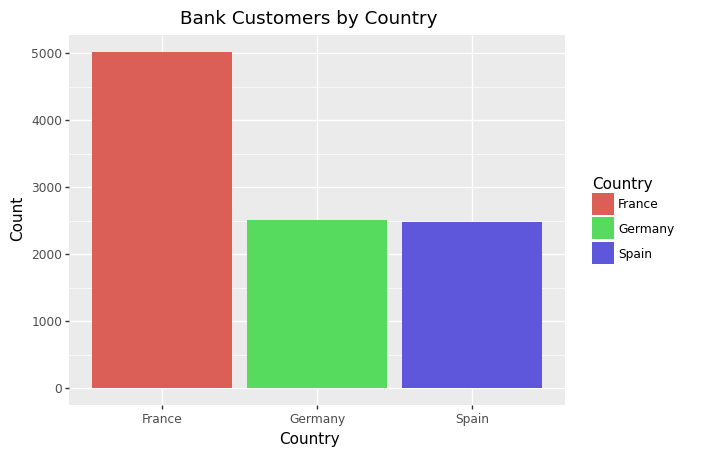

<ggplot: (8669785023341)>

In [24]:
# Visualize data by country/geography
(ggplot(churn,aes('Geography',fill='factor(Geography)')) +
  geom_bar(stat = 'count') +
  ggtitle('Bank Customers by Country') +
  xlab('Country') +
  ylab('Count') +
  labs(fill='Country'))

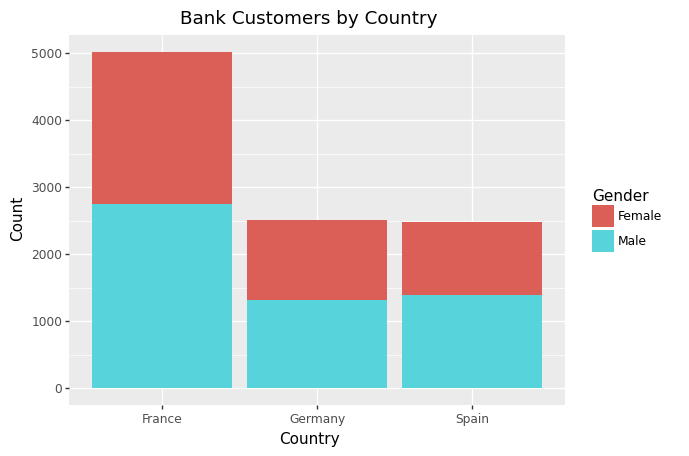

<ggplot: (8669788357846)>

In [25]:
# Visualize counts by gender nested within country
(ggplot(churn,aes('Geography',fill='factor(Gender)')) +
  geom_bar(stat = 'count') +
  ggtitle('Bank Customers by Country') +
  xlab('Country') +
  ylab('Count') +
  labs(fill='Gender'))

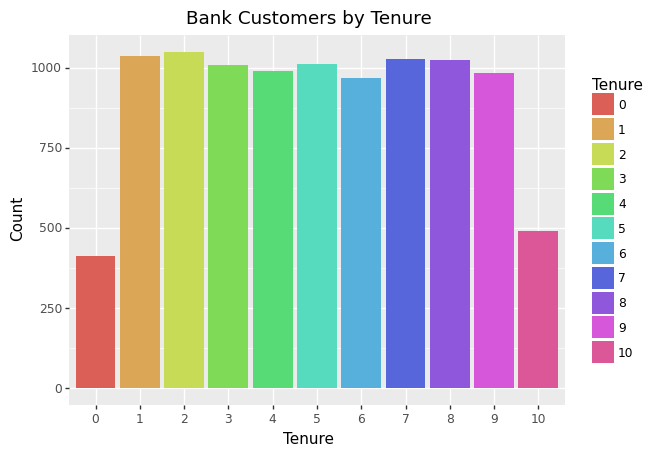

<ggplot: (8669786167570)>

In [26]:
# Visualize counts by year of tenure
(ggplot(churn,aes('factor(Tenure)',fill='factor(Tenure)')) +
  geom_bar(stat = 'count') +
  ggtitle('Bank Customers by Tenure') +
  xlab('Tenure') +
  ylab('Count') +
  labs(fill='Tenure'))

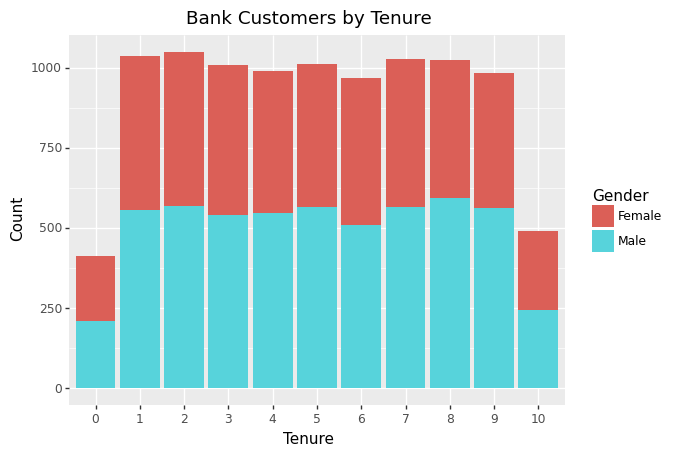

<ggplot: (8669788358545)>

In [27]:
# Visualize gender counts nested by tenure year
(ggplot(churn,aes('factor(Tenure)',fill='factor(Gender)')) +
  geom_bar(stat = 'count') +
  ggtitle('Bank Customers by Tenure') +
  xlab('Tenure') +
  ylab('Count') +
  labs(fill='Gender'))

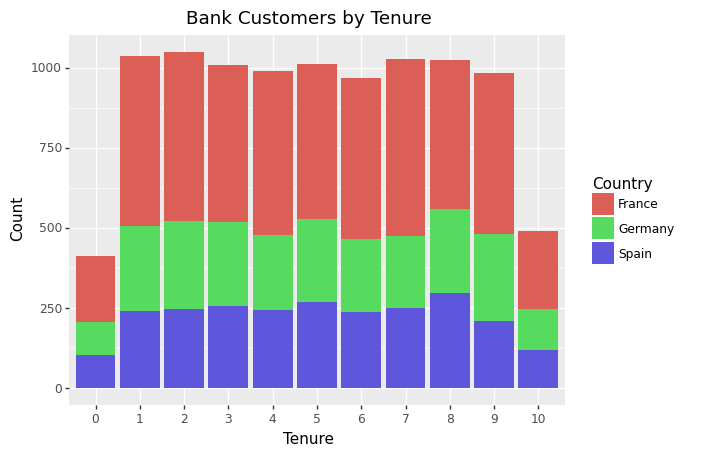

<ggplot: (8669782650301)>

In [28]:
# Visualize country counts nested in tenure year
(ggplot(churn,aes('factor(Tenure)',fill='factor(Geography)')) +
  geom_bar(stat = 'count') +
  ggtitle('Bank Customers by Tenure') +
  xlab('Tenure') +
  ylab('Count') +
  labs(fill='Country'))

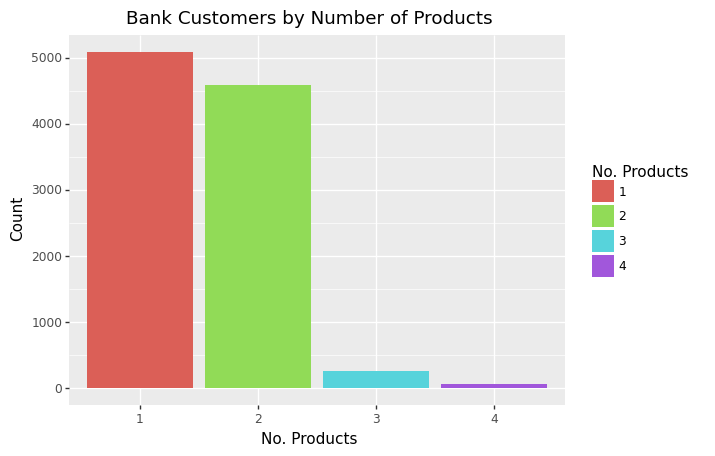

<ggplot: (8669782733125)>

In [29]:
# Visualize counts of customers by number of products
(ggplot(churn,aes('factor(NumOfProducts)',fill='factor(NumOfProducts)')) +
  geom_bar(stat = 'count') +
  ggtitle('Bank Customers by Number of Products') +
  xlab('No. Products') +
  ylab('Count') +
  labs(fill='No. Products'))

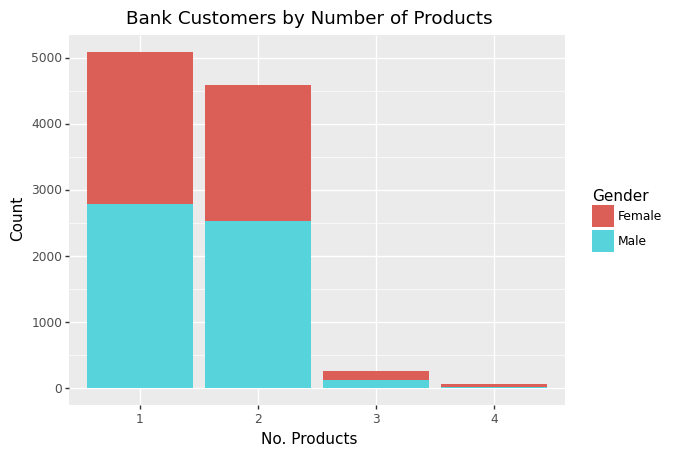

<ggplot: (8669782577288)>

In [30]:
# Visualize gender counts nested by number of products
(ggplot(churn,aes('factor(NumOfProducts)',fill='factor(Gender)')) +
  geom_bar(stat = 'count') +
  ggtitle('Bank Customers by Number of Products') +
  xlab('No. Products') +
  ylab('Count') +
  labs(fill='Gender'))


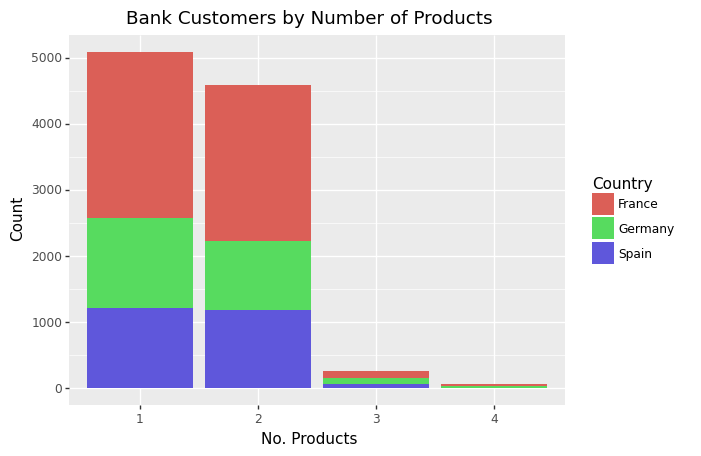

<ggplot: (8669788357753)>

In [31]:
# Visualize country counts nested by number of products
(ggplot(churn, aes(x = 'factor(NumOfProducts)',fill='factor(Geography)')) +
  geom_bar(stat = 'count') +
  ggtitle('Bank Customers by Number of Products') +
  xlab('No. Products') +
  ylab('Count') +
  labs(fill='Country'))


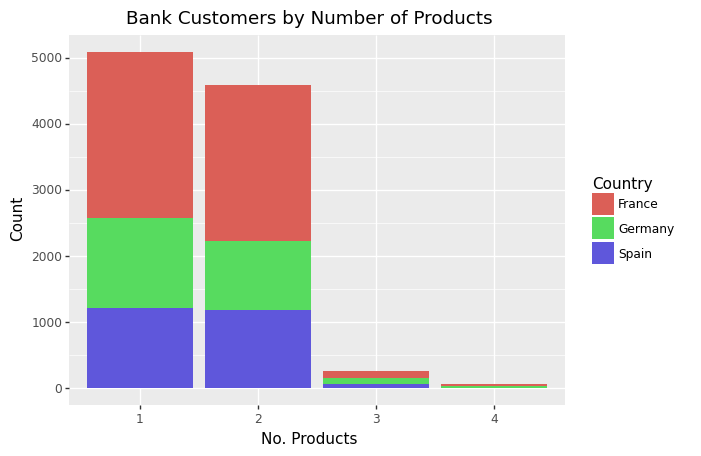

<ggplot: (8669785023338)>

In [32]:
# Visualize country counts nested by number of products
(ggplot(churn, aes(x = 'factor(NumOfProducts)',fill='factor(Geography)')) +
  geom_bar(stat = 'count') +
  ggtitle('Bank Customers by Number of Products') +
  xlab('No. Products') +
  ylab('Count') +
  labs(fill='Country'))


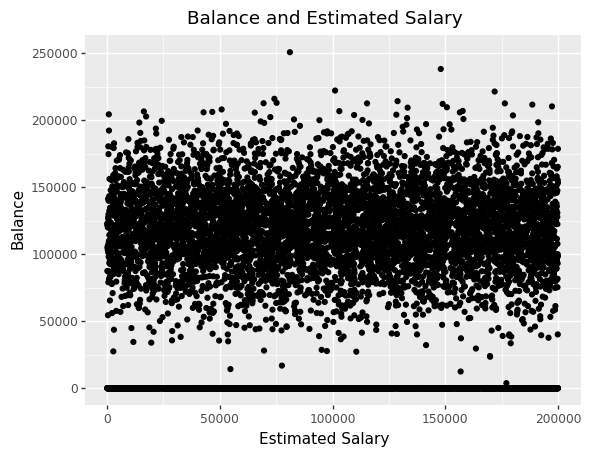

<ggplot: (8669785042548)>

In [33]:
# Visualize estimated salary by balance
(ggplot(churn,aes('EstimatedSalary', 'Balance')) +
  geom_point() +
  xlab("Estimated Salary") +
  ylab("Balance") +
  ggtitle("Balance and Estimated Salary"))

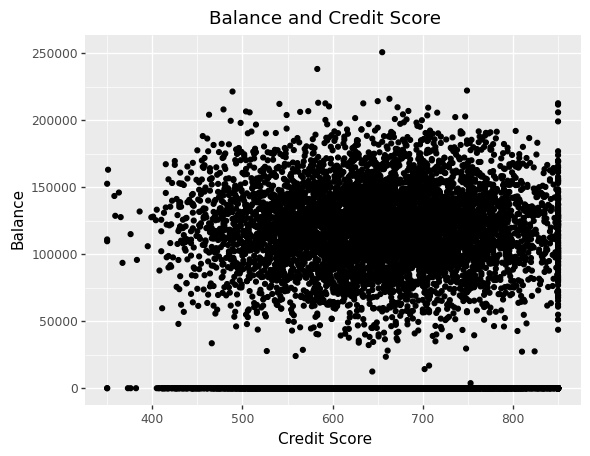

<ggplot: (8669787516844)>

In [34]:
# Visualize credit score by balance
(ggplot(churn,aes('CreditScore', 'Balance')) +
  geom_point() +
  xlab("Credit Score") +
  ylab("Balance") +
  ggtitle("Balance and Credit Score"))

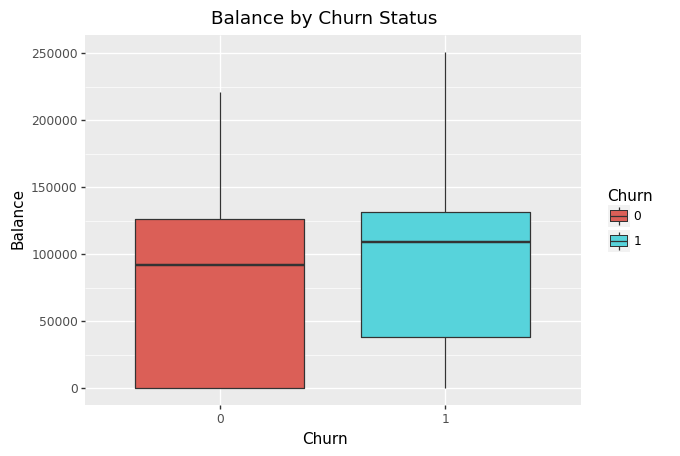

<ggplot: (8669782418913)>

In [35]:
# Visualize exit status by balance
(ggplot(churn,aes('factor(Exited)','Balance',fill='factor(Exited)')) +
  geom_boxplot() +
  xlab('Churn') +
  ylab('Balance') +
  ggtitle('Balance by Churn Status') +
  labs(fill='Churn'))

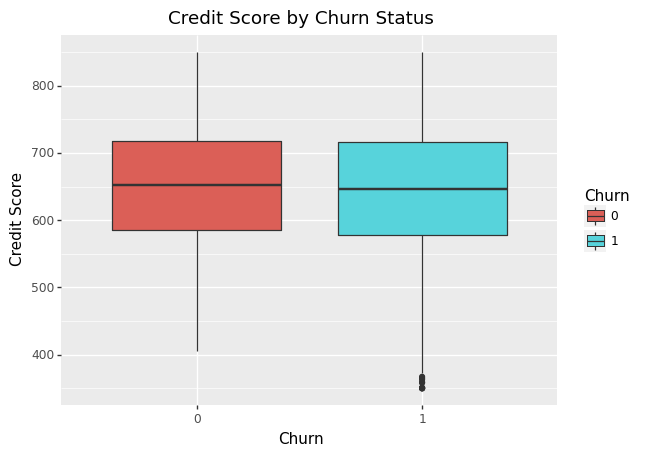

<ggplot: (8669782419132)>

In [36]:
# Visualize exit status by credit score
(ggplot(churn,aes('factor(Exited)','CreditScore',fill='factor(Exited)')) +
  geom_boxplot() +
  xlab('Churn') +
  ylab('Credit Score') +
  ggtitle('Credit Score by Churn Status') +
  labs(fill='Churn'))

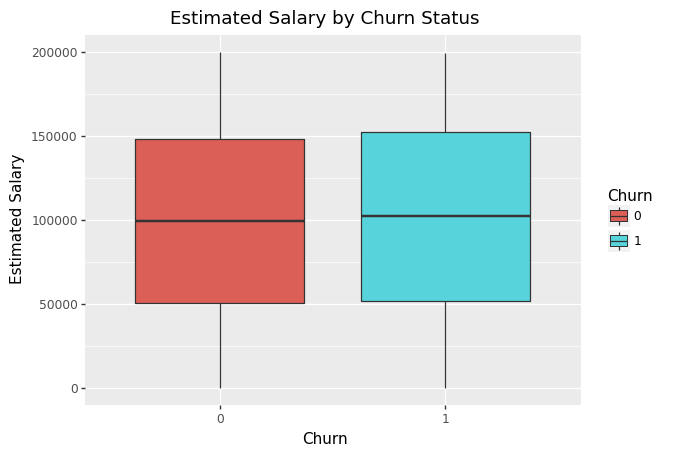

<ggplot: (8669782300645)>

In [37]:
# Visualize exit status by estimated salary
(ggplot(churn,aes('factor(Exited)','EstimatedSalary',fill='factor(Exited)')) +
  geom_boxplot() +
  xlab('Churn') +
  ylab('Estimated Salary') +
  ggtitle('Estimated Salary by Churn Status') +
  labs(fill='Churn'))

In [38]:
# Some descriptive statistics and tests

import scipy.stats as sps

In [39]:
# correlations
sps.pearsonr(churn.CreditScore,churn.EstimatedSalary)

PearsonRResult(statistic=-0.0013842928679845324, pvalue=0.8899147753803484)

In [40]:
sps.pearsonr(churn.CreditScore,churn.Balance)

PearsonRResult(statistic=0.006268381616008721, pvalue=0.5308126602883302)

In [41]:
sps.pearsonr(churn.Balance,churn.EstimatedSalary)

PearsonRResult(statistic=0.01279749634055569, pvalue=0.20067105296574964)

In [42]:
# Do males and females have different average estimated salaries?

# test equality of variance
sps.levene(churn[churn.Gender == "Female"]['EstimatedSalary'],
           churn[churn.Gender == "Male"]['EstimatedSalary'],
           center='mean') # fail to reject


LeveneResult(statistic=0.5138439988784133, pvalue=0.473496281028016)

In [43]:
# t test
sps.ttest_ind(churn[churn.Gender == "Female"]['EstimatedSalary'],
              churn[churn.Gender == "Male"]['EstimatedSalary']) # fail to reject


Ttest_indResult(statistic=0.8111794562250657, pvalue=0.4172819312945406)

In [53]:
# New variables based on data visualization
churn['MaxCred'] = 0
churn.MaxCred[churn.CreditScore >= 750] = 1

<ipython-input-53-a977e092e1c4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [55]:
churn['ZeroBalance'] = 0
churn.ZeroBalance[churn.Balance == 0] = 1

<ipython-input-55-12a69326cd4e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [56]:
churn['German'] = 0
churn.German[churn.Geography == 'Germany'] = 1

<ipython-input-56-e2db600017f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [57]:
mod1 = smf.logit("Exited ~ C(Gender)",data=churn).fit()
mod1.summary() # significant

Optimization terminated successfully.
         Current function value: 0.499837
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                 0.01118
Time:                        20:05:18   Log-Likelihood:                -4998.4
converged:                       True   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                 2.110e-26
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.0948      0.034    -31.983      0.000      -1.162      -1.028
C(Gender)[T.Male]    -0.5299      0.050    -10.588      0.000      -0.628      -0.432
=====================================================================================
"""

In [58]:
mod2 = smf.logit("Exited ~ C(Geography)",data=churn).fit()
mod2.summary() # Germany distinct from Spain/France

Optimization terminated successfully.
         Current function value: 0.491472
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                 0.02773
Time:                        20:06:01   Log-Likelihood:                -4914.7
converged:                       True   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                 1.333e-61
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -1.6468      0.038    -42.915      0.000      -1.722      -1.572
C(Geography)[T.Germany]     0.9133      0.057     15.920      0.000       0.801       1.026
C(Geography)[T.Spain]       0.0378      0.066      0.571      0.568      -0.092       0.167
===========================================================================================
"""

In [59]:
mod3 = smf.logit("Exited ~ C(IsActiveMember)",data=churn).fit()
mod3.summary() # significant

Optimization terminated successfully.
         Current function value: 0.493198
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                 0.02432
Time:                        20:06:34   Log-Likelihood:                -4932.0
converged:                       True   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                 2.107e-55
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1.0022      0.032    -30.929      0.000      -1.066      -0.939
C(IsActiveMember)[T.1]    -0.7909      0.051    -15.402      0.000      -0.892      -0.690
==========================================================================================
"""

In [60]:
mod4 = smf.logit("Exited ~ C(MaxCred)",data=churn).fit()
mod4.summary() # not significant


Optimization terminated successfully.
         Current function value: 0.505468
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:               4.162e-05
Time:                        20:06:52   Log-Likelihood:                -5054.7
converged:                       True   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                    0.5165
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.3563      0.027    -50.099      0.000      -1.409      -1.303
C(MaxCred)[T.1]    -0.0439      0.068     -0.647      0.518      -0.177       0.089
===================================================================================
"""

In [61]:
mod5 = smf.logit("Exited ~ C(ZeroBalance)",data=churn).fit()
mod5.summary() # significant

Optimization terminated successfully.
         Current function value: 0.497651
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                 0.01551
Time:                        20:07:34   Log-Likelihood:                -4976.5
converged:                       True   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                 5.781e-36
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -1.1483      0.029    -39.227      0.000      -1.206      -1.091
C(ZeroBalance)[T.1]    -0.6817      0.056    -12.093      0.000      -0.792      -0.571
=======================================================================================
"""

In [62]:
mod6 = smf.logit("Exited ~ C(German)",data=churn).fit()
mod6.summary() # significant


Optimization terminated successfully.
         Current function value: 0.491488
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                 0.02770
Time:                        20:07:44   Log-Likelihood:                -4914.9
converged:                       True   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                 7.451e-63
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.6342      0.031    -52.276      0.000      -1.695      -1.573
C(German)[T.1]     0.9007      0.053     17.034      0.000       0.797       1.004
==================================================================================
"""

In [63]:
mod7 = smf.logit("Exited ~ C(NumOfProducts)",data=churn).fit(maxiter=1000)
mod7.summary()

         Current function value: 0.435536
         Iterations: 1000


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                  0.1384
Time:                        20:08:21   Log-Likelihood:                -4355.4
converged:                      False   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                4.688e-303
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.9587      0.031    -30.595      0.000      -1.020      -0.897
C(NumOfProducts)[T.2]    -1.5419      0.064    -24.107      0.000      -1.667      -1.417
C(NumOfProducts)[T.3]     2.5237      0.165     15.283      0.000       2.200       2.847
C(NumOfProducts)[T.4]    33.9457   1.89e+06    1.8e-05      1.000   -3.71e+06    3.71e+06
=========================================================================================
"""

In [64]:
churn['ThreeFour'] = 0
churn.ThreeFour[((churn.NumOfProducts == 3) | (churn.NumOfProducts == 4))] = 1


<ipython-input-64-6d5512c96c47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [65]:
mod8 = smf.logit("Exited ~ C(ThreeFour)",data=churn).fit(maxiter=100)
mod8.summary()


Optimization terminated successfully.
         Current function value: 0.471662
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Sat, 15 Jul 2023   Pseudo R-squ.:                 0.06692
Time:                        20:08:57   Log-Likelihood:                -4716.6
converged:                       True   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                3.778e-149
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.5054      0.026    -57.084      0.000      -1.557      -1.454
C(ThreeFour)[T.1]     3.3116      0.161     20.535      0.000       2.995       3.628
=====================================================================================
"""

In [77]:
# processing dataset for sklearn and xgboost packages

Pred = churn.drop(["CustomerId", "Exited"],axis=1).copy()


In [78]:
Pred[['Tenure',
      'NumOfProducts',
      'HasCrCard',
      'IsActiveMember',
      'MaxCred',
      'ZeroBalance',
      'German',
      'ThreeFour'
      ]] = Pred[['Tenure',
                 'NumOfProducts',
                 'HasCrCard',
                 'IsActiveMember',
                 'MaxCred',
                 'ZeroBalance',
                 'German',
                 'ThreeFour'
                 ]].astype(str)

In [79]:
# encoding categorical variables

lbl = preprocessing.OneHotEncoder()
PredC = lbl.fit_transform(Pred[['Tenure',
                                'NumOfProducts',
                                'HasCrCard',
                                'IsActiveMember',
                                'MaxCred',
                                'ZeroBalance',
                                'German',
                                'Geography',
                                'Gender',
                                'ThreeFour'
                                ]].astype(str))


In [80]:
Pred

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,MaxCred,ZeroBalance,German,ThreeFour
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,1,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,1,1,0,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,0,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0,1,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [81]:
PredC = pd.DataFrame.sparse.from_spmatrix(PredC)

In [82]:
PredC

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
9996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
9998,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [83]:
# column names for new binary variables
Col = ['T0','T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','N1','N2','N3',
       'N4','C0','C1','A0','A1','M0','M1','Z0','Z1','Ger0','Ger1','Geo0','Geo1',
       'Geo2','S0','S1','TF0','TF1']

In [84]:
PredC.columns = Col

In [85]:
# numerical predictors
PredN = Pred.drop(['Tenure','NumOfProducts','HasCrCard','IsActiveMember',
                   'MaxCred','ZeroBalance','German','ThreeFour','Geography',
                   'Gender'], axis = 1)

In [86]:
# categorical predictors for logistic regression
PredCl = lbl.fit_transform(Pred[['IsActiveMember',
                                'German',
                                'Gender',
                                'ThreeFour'
                                ]].astype(str))

In [87]:
PredCl = pd.DataFrame.sparse.from_spmatrix(PredCl)


In [88]:
Col = ['A0','A1','Ger0','Ger1','S0','S1','TF0','TF1']

PredCl.columns = Col

In [91]:
# numerical predictors for logistic regression
PredNl = Pred[['Age','CreditScore']]


In [92]:
Pred = pd.concat([PredC, PredN], axis = 1)
Predl = pd.concat([PredCl, PredNl], axis = 1)

In [94]:
# dependent/response variable
Resp = churn.Exited.copy()

In [95]:
# sklearn logistic regression
lrcl = LogisticRegression().fit(Predl.to_numpy(),Resp.to_numpy())

In [97]:
pl = lrcl.predict(Predl.to_numpy()) # predict classification,

In [99]:
acc = skm.accuracy_score(Resp,pl) # 83.03%
acc

0.8303

In [100]:
ppl = lrcl.predict_proba(Predl.to_numpy()) # predicted probabilities


array([[0.88387916, 0.11612084],
       [0.89012201, 0.10987799],
       [0.07049667, 0.92950333],
       ...,
       [0.9270047 , 0.0729953 ],
       [0.65681749, 0.34318251],
       [0.88932896, 0.11067104]])

In [101]:
pl2 = np.repeat(0,10000)
pl2[ppl[:,1]>=.5]=1 # default cutoff, 50%
# Here the cutoff is set, means if there is atleast 50% probability that a customer will churn then 1 otherwise zero

In [102]:
acc2 = skm.accuracy_score(Resp,pl2)
acc2

0.8303

In [107]:
pl3 = np.repeat(0,10000)
pl3[ppl[:,1]>=.45] = 1 # 45% cutoff
# Here the cutoff is set, means if there is atleast 45% probability that a customer will churn then 1 otherwise zero

In [108]:
acc3 = skm.accuracy_score(Resp,pl3) # 83.05%
acc3

0.8305

In [110]:
conf = skm.confusion_matrix(Resp,pl)
conf

array([[7720,  243],
       [1454,  583]])

In [122]:
# xgboost model
xgbcl = xgb.XGBClassifier(objective = "binary:logistic",
                          verbosity = 2,
                          use_label_encoder = False)

#                          enable_categorical = True,
 #                         tree_method="gpu_hist"

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.


In [123]:
xgbcl.fit(Pred,Resp)

[20:58:37] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=6
[20:58:37] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 98 extra nodes, 0 pruned nodes, max_depth=6
[20:58:37] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 100 extra nodes, 0 pruned nodes, max_depth=6
[20:58:37] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 108 extra nodes, 0 pruned nodes, max_depth=6
[20:58:37] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 104 extra nodes, 0 pruned nodes, max_depth=6
[20:58:37] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 116 extra nodes, 0 pruned nodes, max_depth=6
[20:58:37] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 120 extra nodes, 0 pruned nodes, max_depth=6
[20:58:37] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 88 extra nodes, 0 pruned nodes, max_depth=6
[20:58:37] INFO: ../src/tree/updater_prune.cc:98: tree pruning end, 94 extra nodes, 0 pruned nodes,

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [124]:
p = xgbcl.predict(Pred) # predict classification
pp = xgbcl.predict_proba(Pred) # predict probabilties

In [127]:
accx = skm.accuracy_score(Resp,p) # 94.16%
accx

0.9416

In [128]:
confx = skm.confusion_matrix(Resp,p)
confx

array([[7886,   77],
       [ 507, 1530]])

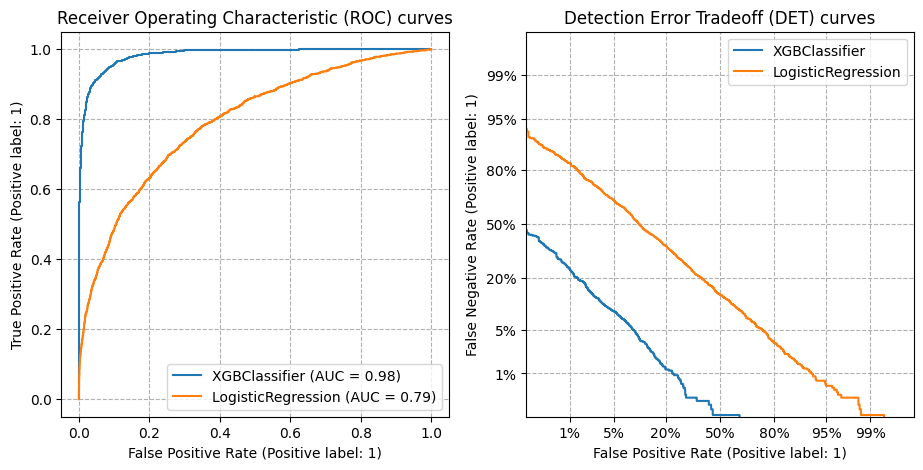

In [150]:
# Plot curves to assess performance of classifiers
fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11, 5))
skm.RocCurveDisplay.from_estimator(xgbcl, Pred, Resp, ax=ax_roc)
skm.DetCurveDisplay.from_estimator(xgbcl, Pred, Resp, ax=ax_det)
skm.RocCurveDisplay.from_estimator(lrcl, Predl.to_numpy(), Resp.to_numpy(), ax=ax_roc)
skm.DetCurveDisplay.from_estimator(lrcl, Predl.to_numpy(), Resp.to_numpy(), ax=ax_det)


ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
ax_det.set_title("Detection Error Tradeoff (DET) curves")

ax_roc.grid(linestyle="--")
ax_det.grid(linestyle="--")

plt.legend()
plt.show()

In [151]:
churn['Probl'] = ppl[:,1]
churn['Probx'] = pp[:,1]

churn = churn.sort_values(by='Probl', ascending=False)


In [152]:
deciles = list(range(10,101,10))
obs = [0]*10
cumu = [0]*10
lift = [0]*10

In [153]:
for i in range(1,11):
    obs[i-1]=round(1000*i)


In [154]:
for i,j in enumerate(obs):
    cumu[i] = (churn.Exited[0:j].sum()/churn.Exited.sum())*100

for i in range(10):
    lift[i]=cumu[i]/deciles[i]

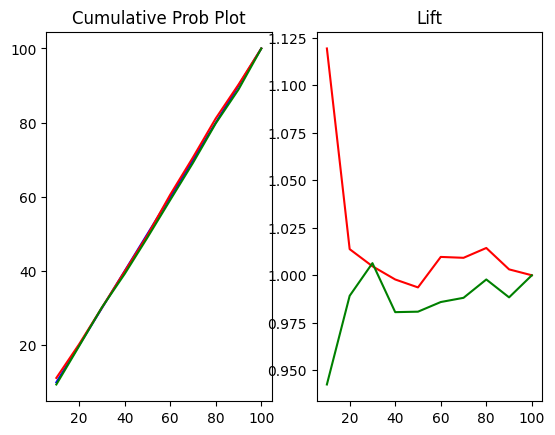

In [156]:
fig, axs = plt.subplots(1,2)

axs[0].plot(deciles, deciles, color='b')
axs[0].plot(deciles,cumu,color='r')

axs[0].set_title('Cumulative Prob Plot')

axs[1].plot(deciles, lift, color='r')

axs[1].set_title('Lift')

churn = churn.sort_values(by='Probx', ascending=False)

deciles = list(range(10,101,10))
obs = [0]*10
cumu = [0]*10
lift = [0]*10

for i in range(1,11):
    obs[i-1]=round(1000*i)

for i,j in enumerate(obs):
    cumu[i] = (churn.Exited[0:j].sum()/churn.Exited.sum())*100

for i in range(10):
    lift[i]=cumu[i]/deciles[i]

axs[0].plot(deciles,cumu,color='g')

axs[1].plot(deciles, lift, color='g')

plt.show()